In [1]:
# Chapter 13
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scp
import math

In [ ]:
#multinormal

In [8]:
def multinormal(mu, sig, n): 
    # computing the square of the variance matrix (sig_sq)
    D, V = np.linalg.eig(sig)
    D_sq = np.power(D,0.5)
    sig_sq = V.dot(np.diag(D_sq)).dot(np.linalg.inv(V))
    sig_sq_inv = np.linalg.inv(sig_sq)
    
    k = len(mu)
    result = np.empty(shape=[n,k])
    
    def getOne(): 
        # Using property 2 of theorem 14.2 to determine a random vector: 
        Z = np.random.normal(size=2).transpose()
        X = mu + np.linalg.solve(sig_sq_inv, Z)
        return X

    for i in range(0,n): 
        X = getOne()
        result[i,:] = X
        
    return result



In [36]:
n = 100
mu = np.array([3, 8])
sig = np.array([[1, 1],
               [1, 2]])
rhoStar = sig[0, 1]/(sig[0, 0]*sig[1, 1])**0.5

In [10]:
data = multinormal(mu, sig, n)

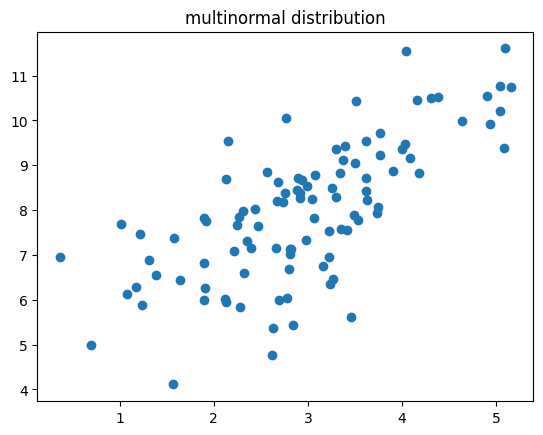

In [12]:
plt.scatter(data[:, 0], data[:, 1])
plt.title("multinormal distribution")
plt.show()

In [14]:
def correlation(xs, ys):
    return np.sum( (xs-xs.mean())*(ys-ys.mean()) )/xs.size/xs.std()/ys.std()
def fun(x):
    return (np.exp(2*x)-1)/(np.exp(2*x)+1)

In [41]:
#Fisher method
def FisherInterval(data, alpha):
    n = data.shape[0]
    rho = correlation(data[:, 0], data[:, 1])
    theta = (np.log(1+rho) - np.log(1-rho) )/2
    se = 1/(n-3)**0.5
    z = scp.norm.ppf(1-alpha/2)
    return fun(theta-se*z), fun(theta+se*z)

In [32]:
#bootstrap method
def bootstrapInterval(data, alpha):
    n = data.shape[0]
    rho = correlation(data[:, 0], data[:, 1])
    rhoBoot = []
    bootn = 100
    for b in range(bootn):
        ids = np.random.randint(0, n, n)
        sample = data[ids, :]
        rhoBoot.append(correlation(sample[:, 0], sample[:, 1]))
    np.sort(rhoBoot)
    return 2*rho-np.quantile(rhoBoot,1-alpha/2), 2*rho-np.quantile(rhoBoot,alpha/2)

In [46]:
simn = 200
n = 100
covFish = 0
covBoot = 0
alpha = 0.05
for _ in range(simn):
    data = multinormal(mu, sig, n)
    a, b = FisherInterval(data, alpha)
    if a <= rhoStar and b >= rhoStar:
        covFish+=1
    a, b = bootstrapInterval(data, alpha)
    if a <= rhoStar and b >= rhoStar:
        covBoot+=1
print(f"Fisher: {covFish}")
print(f"Bootstrap: {covBoot}")

Fisher: 191
Bootstrap: 186


In [44]:
rhoStar


0.7071067811865475